In [225]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "ibm-stocks-dataset"

# **Import**

In [226]:
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)

# **1. Data Import & EDA**

In [227]:
df <- read.csv('/kaggle/input/ibm-stocks-dataset/ibm_stock_data.csv')

In [228]:
str(df)

'data.frame':	592 obs. of  7 variables:
 $ Date     : chr  "2022-01-03" "2022-01-04" "2022-01-05" "2022-01-06" ...
 $ Open     : num  134 136 138 138 135 ...
 $ High     : num  136 140 142 138 136 ...
 $ Low      : num  134 136 138 133 134 ...
 $ Close    : num  136 138 138 135 135 ...
 $ Adj.Close: num  122 124 124 122 121 ...
 $ Volume   : int  4605900 7300000 8956900 9908100 5238100 5432800 11105300 5352000 4868300 5310300 ...


In [229]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Date*,1,592,296.5000,1.710400e+02,296.5000,296.5000,2.194248e+02,1.0000,592.00,5.910000e+02,0.000000,-1.2060828,7.029699e+00
Open,2,592,143.1618,1.884578e+01,137.3300,140.0545,1.210543e+01,116.1000,197.58,8.148000e+01,1.344963,0.9141201,7.745566e-01
High,3,592,144.3708,1.895163e+01,138.7650,141.2093,1.226111e+01,118.8100,199.18,8.037000e+01,1.360624,0.9700120,7.789070e-01
Low,4,592,141.9884,1.874238e+01,136.1950,138.9521,1.232041e+01,115.5500,196.14,8.059000e+01,1.312644,0.8232354,7.703071e-01
Close,5,592,143.2349,1.883938e+01,137.7250,140.1537,1.253537e+01,117.5700,197.78,8.021000e+01,1.328778,0.8779079,7.742939e-01
Adj.Close,6,592,137.0171,2.183548e+01,129.2536,133.5110,1.433343e+01,109.6874,197.78,8.809257e+01,1.264308,0.5842801,8.974327e-01
Volume,7,592,4757491.3851,2.889901e+06,4132300.0000,4291345.1477,1.330337e+06,1477100.0000,37400200.00,3.592310e+07,5.610641,47.1940312,1.187742e+05


In [230]:
summary(df)

     Date                Open            High            Low       
 Length:592         Min.   :116.1   Min.   :118.8   Min.   :115.5  
 Class :character   1st Qu.:130.3   1st Qu.:131.2   1st Qu.:129.2  
 Mode  :character   Median :137.3   Median :138.8   Median :136.2  
                    Mean   :143.2   Mean   :144.4   Mean   :142.0  
                    3rd Qu.:147.4   3rd Qu.:148.3   3rd Qu.:146.8  
                    Max.   :197.6   Max.   :199.2   Max.   :196.1  
     Close         Adj.Close         Volume        
 Min.   :117.6   Min.   :109.7   Min.   : 1477100  
 1st Qu.:130.1   1st Qu.:121.4   1st Qu.: 3339775  
 Median :137.7   Median :129.3   Median : 4132300  
 Mean   :143.2   Mean   :137.0   Mean   : 4757491  
 3rd Qu.:147.4   3rd Qu.:143.1   3rd Qu.: 5279375  
 Max.   :197.8   Max.   :197.8   Max.   :37400200  

**Check missing value**

In [231]:
colSums(is.na(df))

Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0

**duplicate check**

In [232]:
sum(duplicated(df))

[1] 0

# **2. Data Transform for Visualization**

In [233]:
df$Date <- as.Date(df$Date)
names(df) <- c('Date','Open','High','Low','Close','Adj','Volume')

**Data Check**

In [234]:
head(df)

,Date,Open,High,Low,Close,Adj,Volume
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2022-01-03,134.07,136.29,133.63,136.04,122.3637,4605900
2,2022-01-04,136.10,139.95,135.90,138.02,124.1447,7300000
3,2022-01-05,138.31,142.20,137.88,138.22,124.3246,8956900
4,2022-01-06,138.20,138.41,132.51,135.34,121.7341,9908100
5,2022-01-07,134.90,135.66,133.51,134.83,121.2754,5238100
6,2022-01-10,134.47,136.20,133.38,135.03,121.4553,5432800


# **3. Data Visualization**

## **Histogram**

In [235]:
p1 <- ggplot(df, aes(x= Open)) + 
    geom_histogram(fill = 'skyblue',bins = 30, col = 'white') + 
    theme_bw() +
    ggtitle('Open Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <-ggplot(df, aes(x= High)) + geom_histogram(fill = 'blue',bins = 30 , col = 'white') + 
    theme_bw() +
    ggtitle('High Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <-ggplot(df, aes(x= Low)) + geom_histogram(fill = 'orange',bins = 30, col = 'white') +
    theme_bw() +
    ggtitle('Low Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <-ggplot(df, aes(x= Close)) + geom_histogram(fill = 'green',bins = 30, col = 'white' ) + 
    theme_bw() +
    ggtitle('Close Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <-ggplot(df, aes(x= Adj)) + geom_histogram(fill = 'yellow', bins = 30,, col = 'white') + 
    theme_bw() +
    ggtitle('Adj Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <-ggplot(df, aes(x= Volume)) + geom_histogram(fill = 'red',bins = 30 ,col = 'white') + 
    theme_bw() +
    ggtitle('Volume Histogram') + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

In [236]:
options(repr.plot.width = 13.0, repr.plot.height = 13.0)

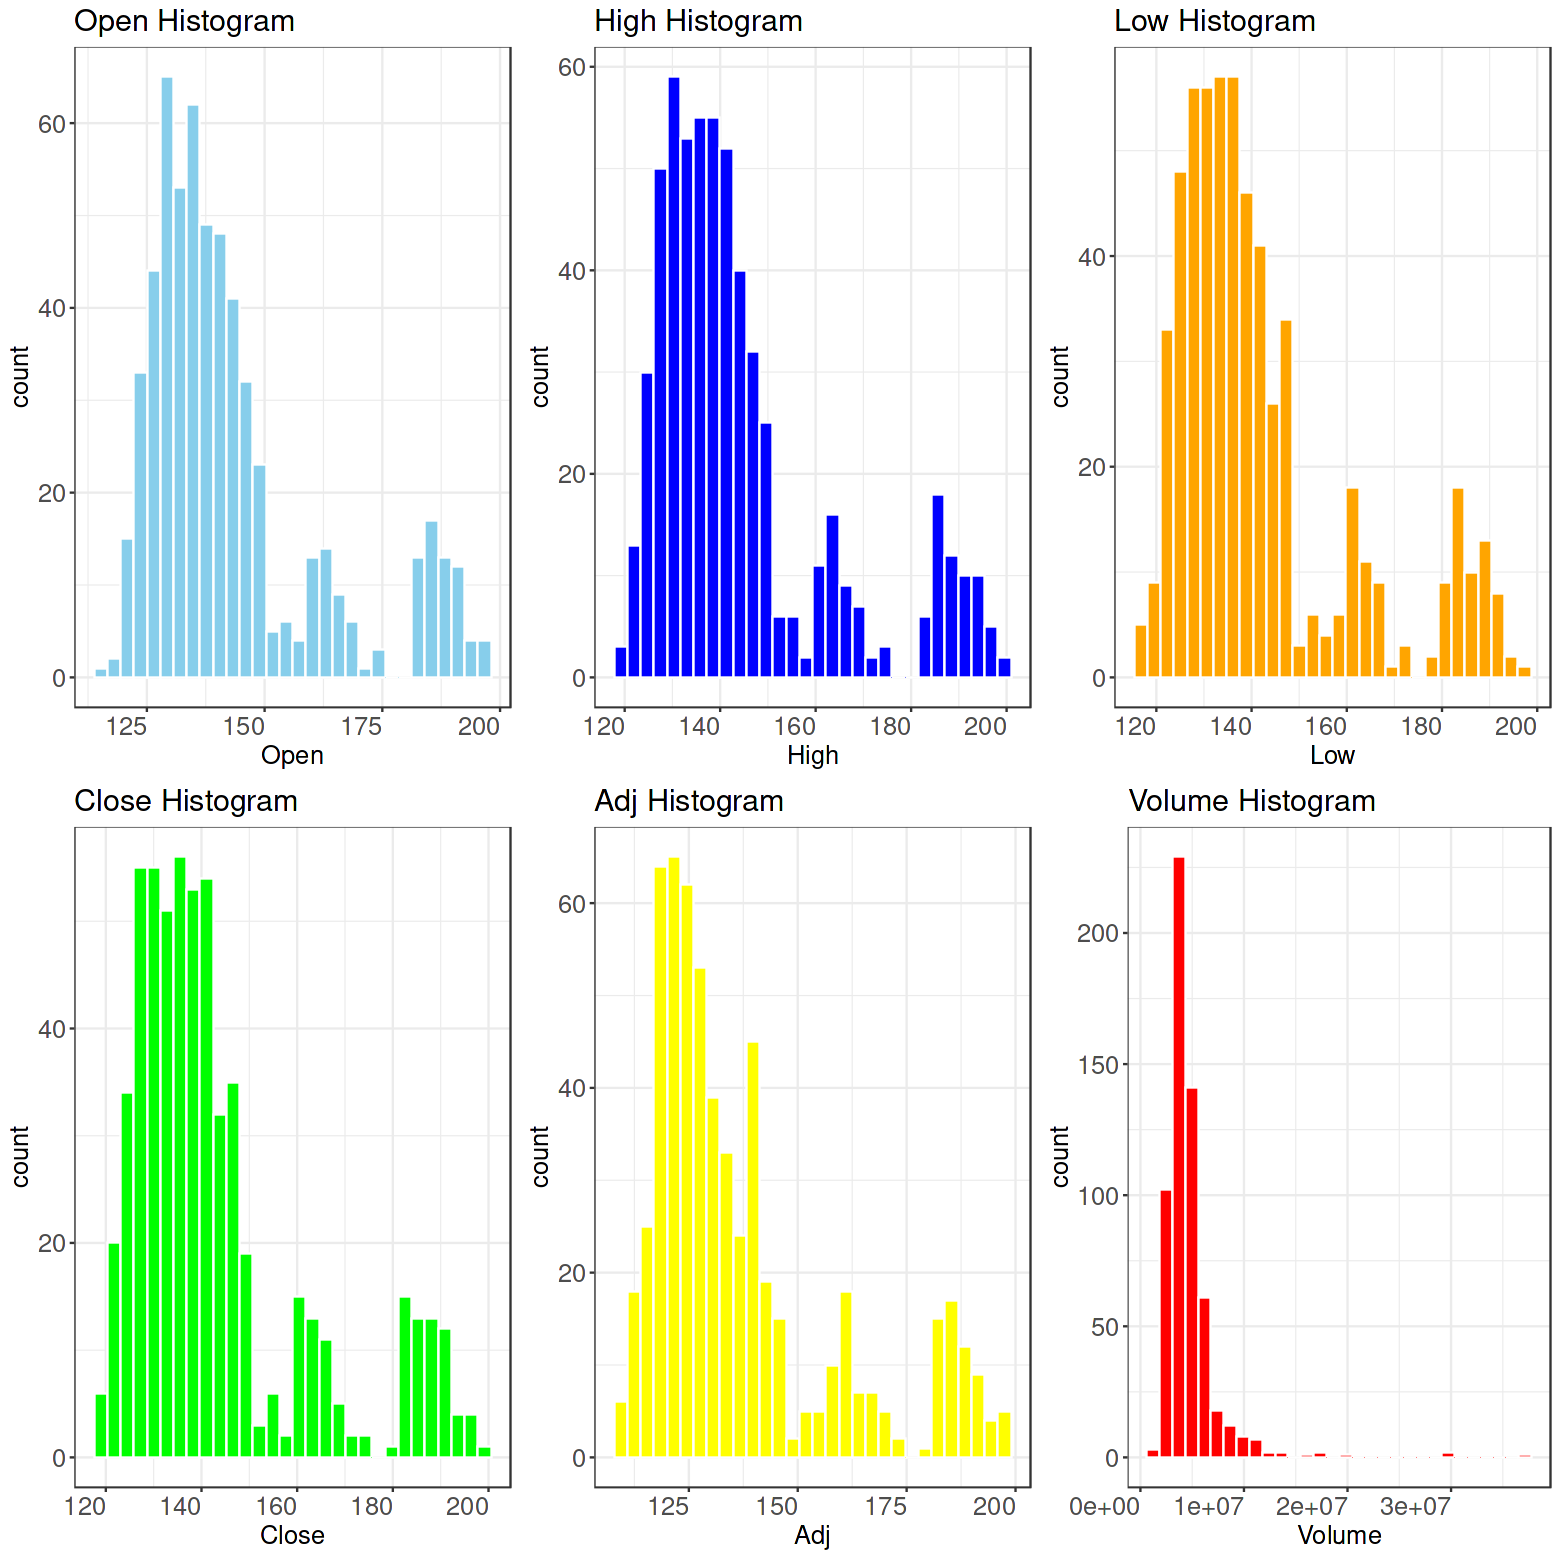

In [237]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

## **Lineplot**

In [238]:
p1 <- ggplot(df, aes(x=Date, y= Open)) + geom_line(color = 'skyblue' ) + ggtitle('Change in \'Open\' by year') +    
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p2 <- ggplot(df, aes(x=Date, y= High)) + geom_line(color = 'blue') + ggtitle('Change in \'High\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p3 <- ggplot(df, aes(x=Date, y= Low)) + geom_line(color = 'orange') + ggtitle('Change in \'Low\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p4 <- ggplot(df, aes(x=Date, y= Close)) + geom_line(color = 'green') + ggtitle('Change in \'Close\' by year') + 
    theme_bw() +    
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p5 <- ggplot(df, aes(x=Date, y= Adj)) + geom_line(color = 'yellow') + ggtitle('Change in \'Adj\' by year') + 
    theme_bw() +
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

p6 <- ggplot(df, aes(x=Date, y= Volume)) + geom_line(color = 'red') + ggtitle('Change in \'Volume\' by year') + 
    theme_bw() + 
    theme(axis.title = element_text(size=15),
    axis.text.x = element_text(size = 15, hjust=1),
    axis.text.y = element_text(size = 15, hjust=1),
    title = element_text(size=15)
    )

In [239]:
options(repr.plot.width = 18.0, repr.plot.height = 13.0)

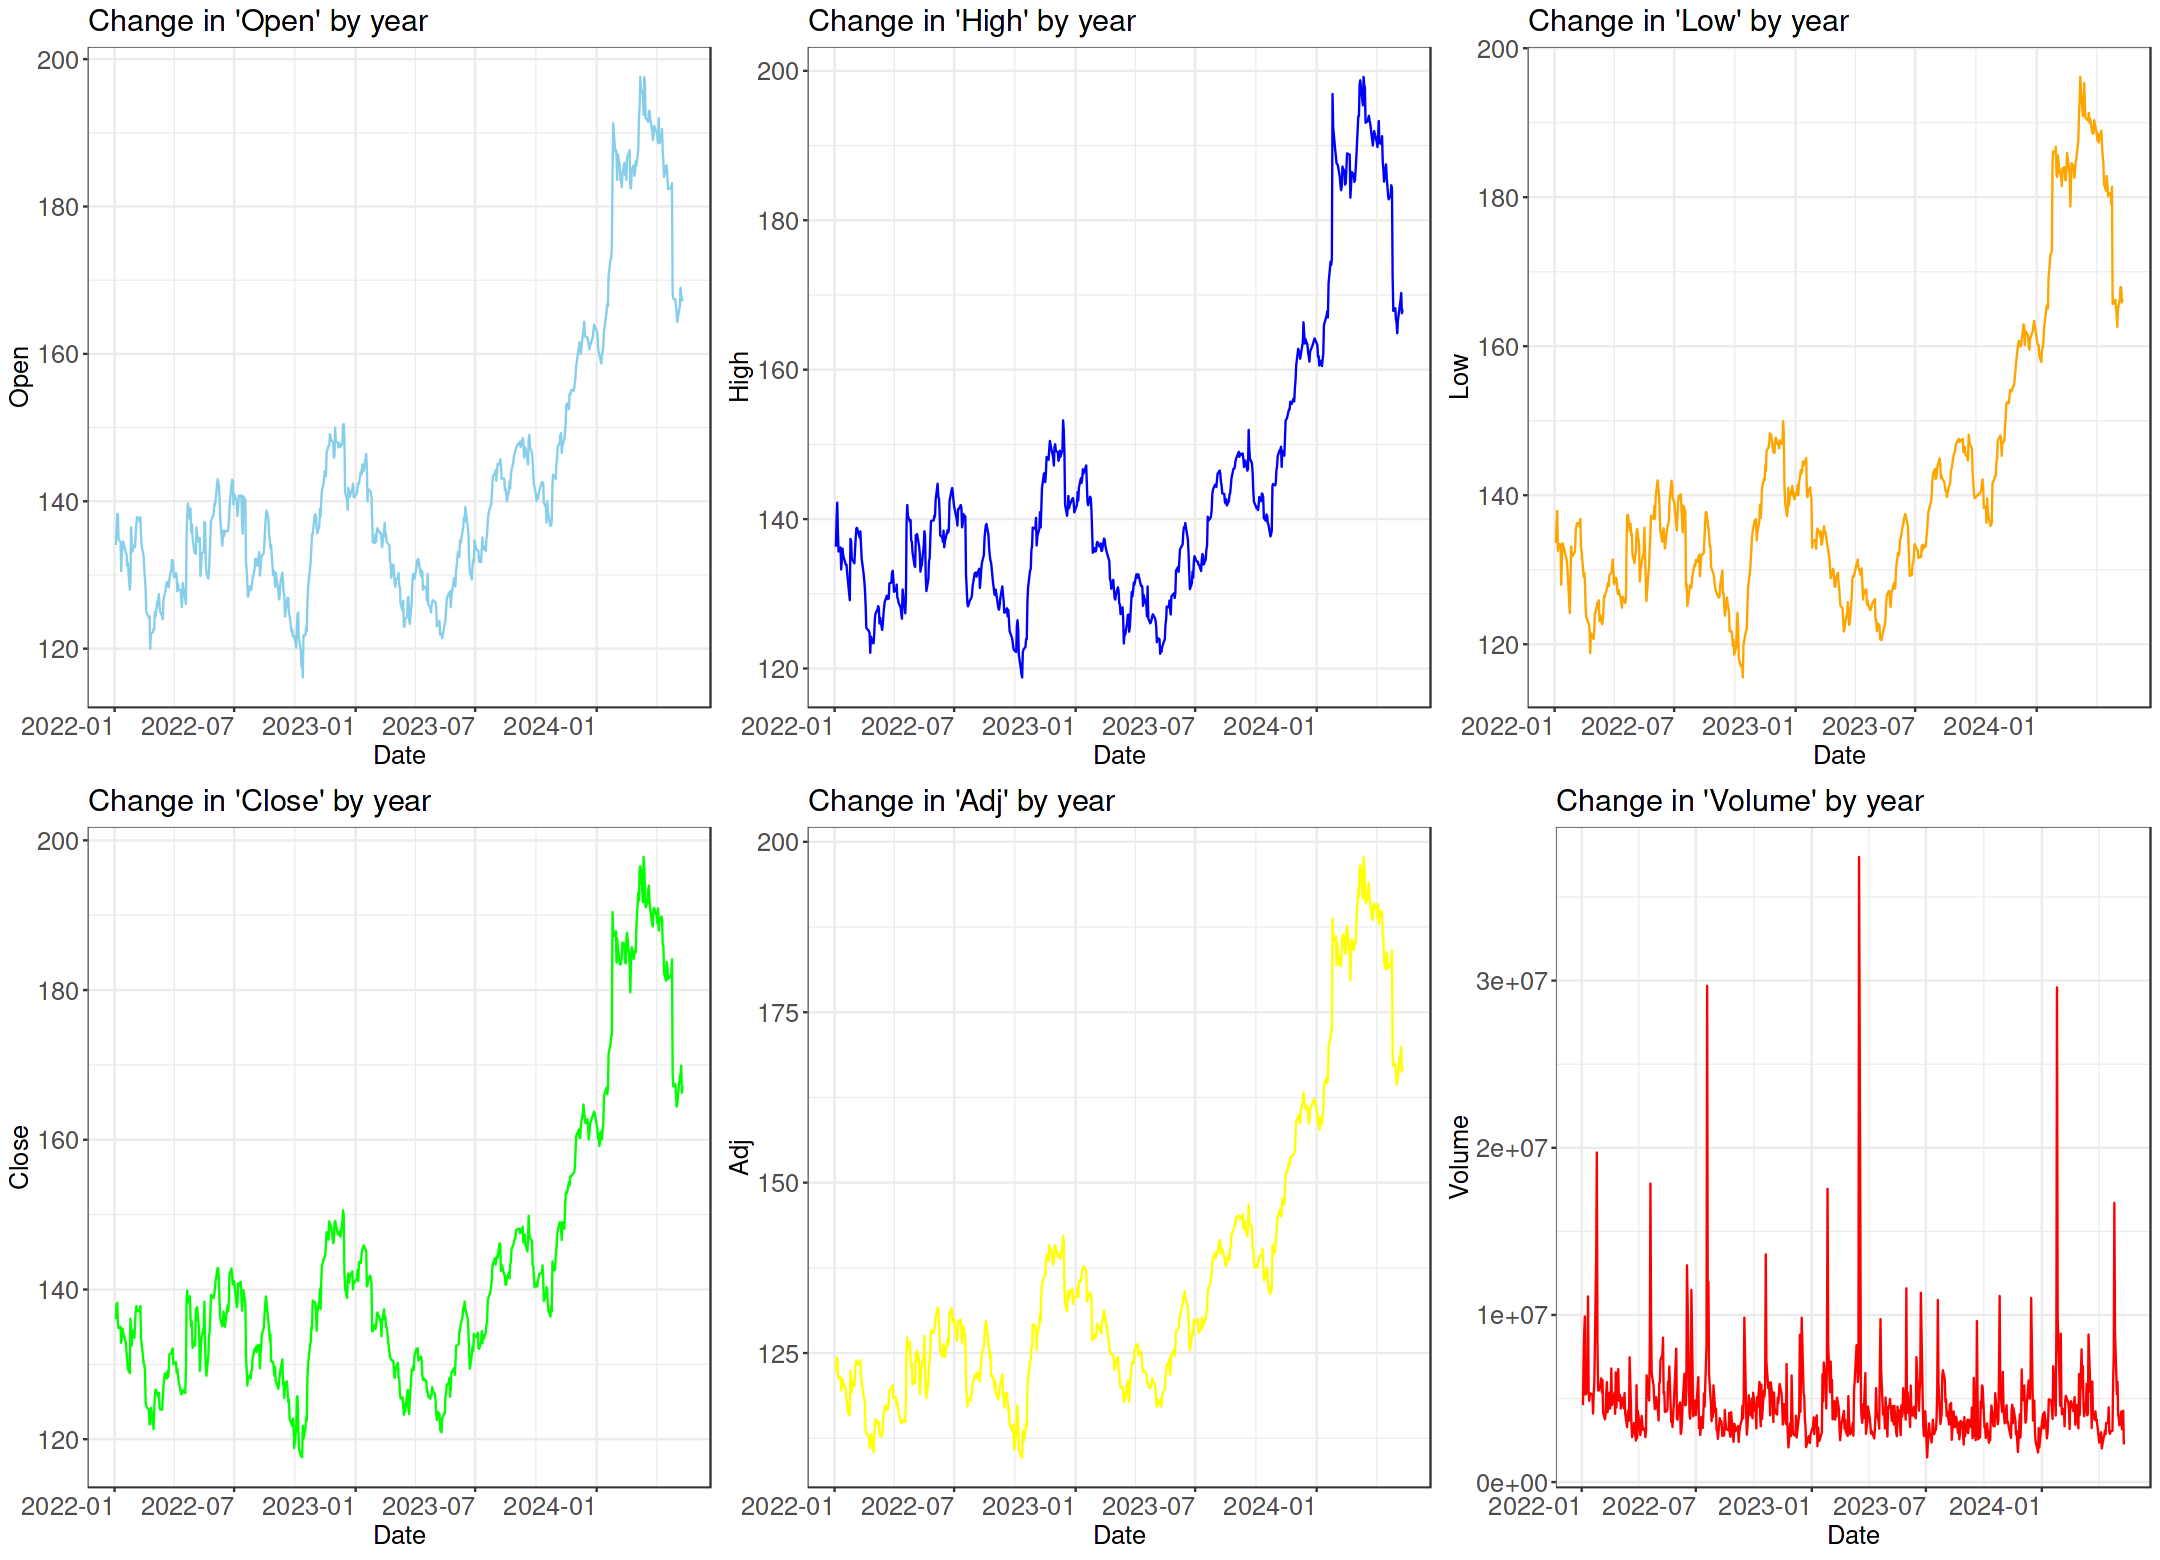

In [240]:
grid.arrange(p1,p2,p3,p4,p5,p6, ncol = 3)

## **Rolling windows(180 Days, 360Days, 600Days) of Close**

In [241]:
df2 <- df

temp <- zoo::zoo(df2$Close, df2$Date)
temp_rollmean90 <- zoo::rollmean(temp, 6 , fill = list(NA, NULL, NA))
temp_rollmean180 <- zoo::rollmean(temp, 12 , fill = list(NA, NULL, NA))
temp_rollmean300 <- zoo::rollmean(temp, 20 , fill = list(NA, NULL, NA))

df2$mean180_close <- zoo::coredata(temp_rollmean90)
df2$mean360_close <- zoo::coredata(temp_rollmean180)
df2$mean600_close <- zoo::coredata(temp_rollmean300)

In [242]:
p1 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean180_close), color = 'red', size = 0.7) +
        ggtitle('Rolling windows(180 Days, 360Days, 600Days) of Close(180 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p2 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean360_close), color = 'blue', size = 0.7) +
        ggtitle('Rolling windows(180 Days, 360Days, 600Days) of Close(360 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

p3 <- ggplot(df2, aes(x = Date, y = Close)) + 
        geom_line(color = 'black', size = 0.7) +
        geom_line(aes(Date, mean600_close), color = 'orange', size = 0.7) +
        ggtitle('Rolling windows(180 Days, 360Days, 600Days) of Close(600 Days) of Close') +
        theme_bw() +
        theme(axis.title = element_text(size=10),
        axis.text.x = element_text(size = 15, hjust=1),
        title = element_text(size=15)
        )

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”


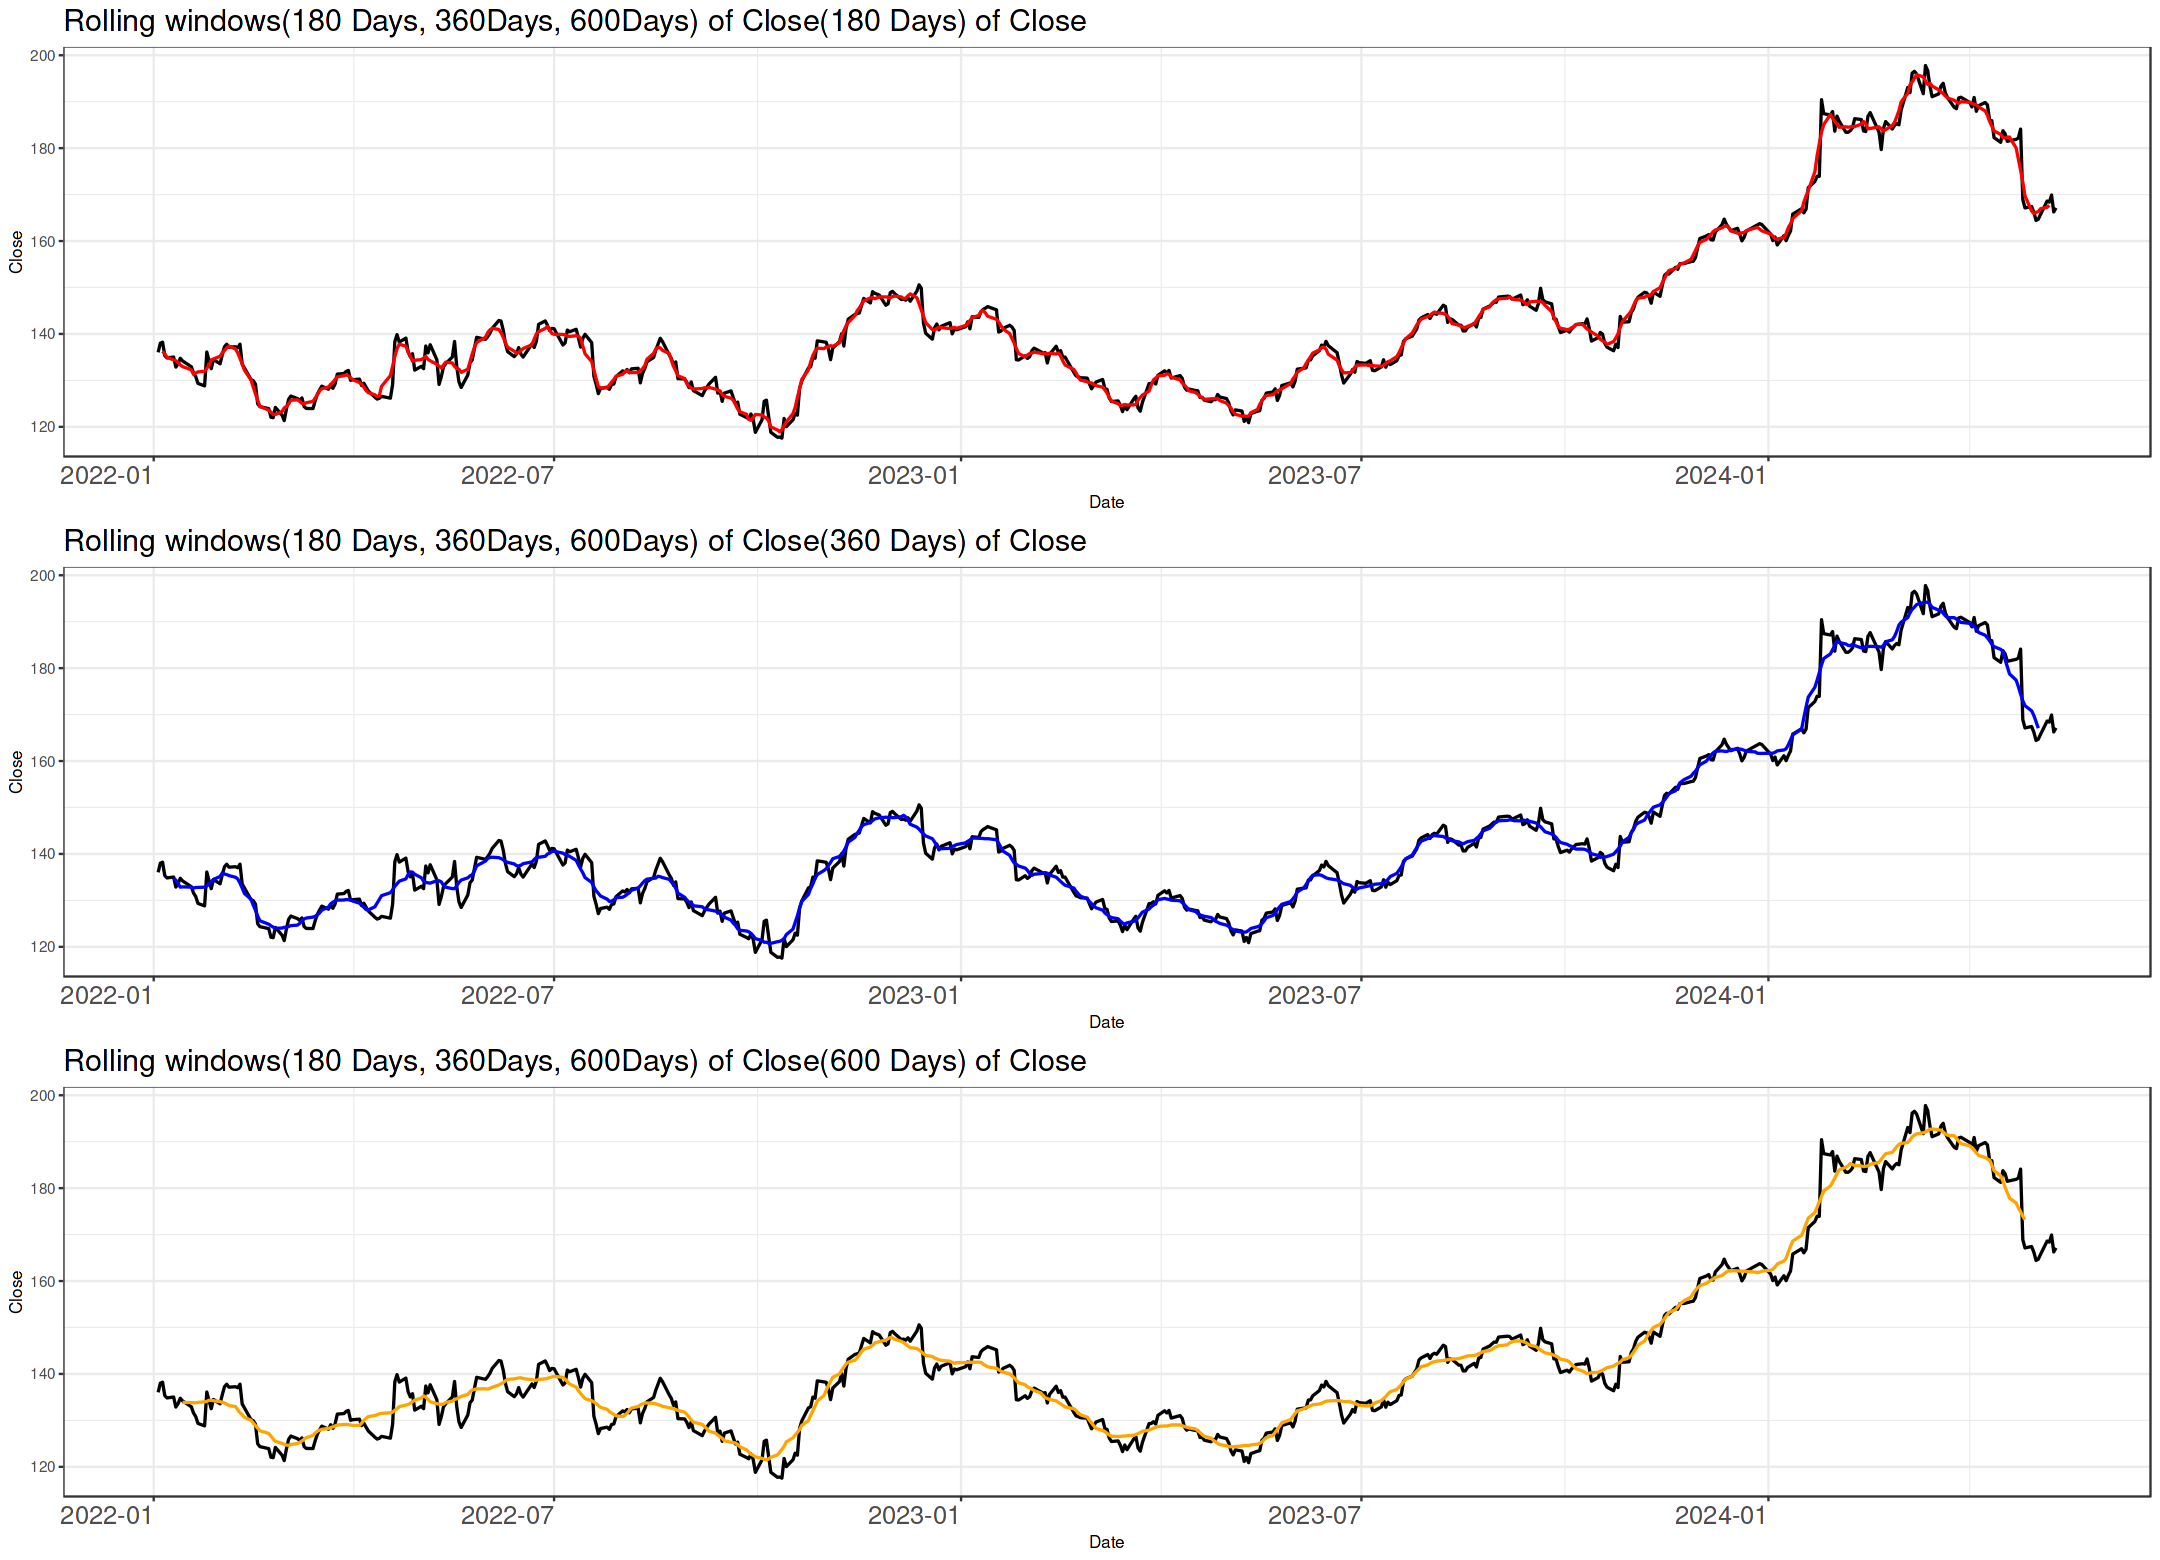

In [243]:
grid.arrange(p1,p2,p3, ncol = 1)

# **4. Modeling**

In [244]:
library(TTR)
library(forecast)
library(tseries)

In [245]:
Close <- df[,'Close']
Close_ts <- ts(Close, frequency = 12, start = c(2022,01) , end = c(2024,04))

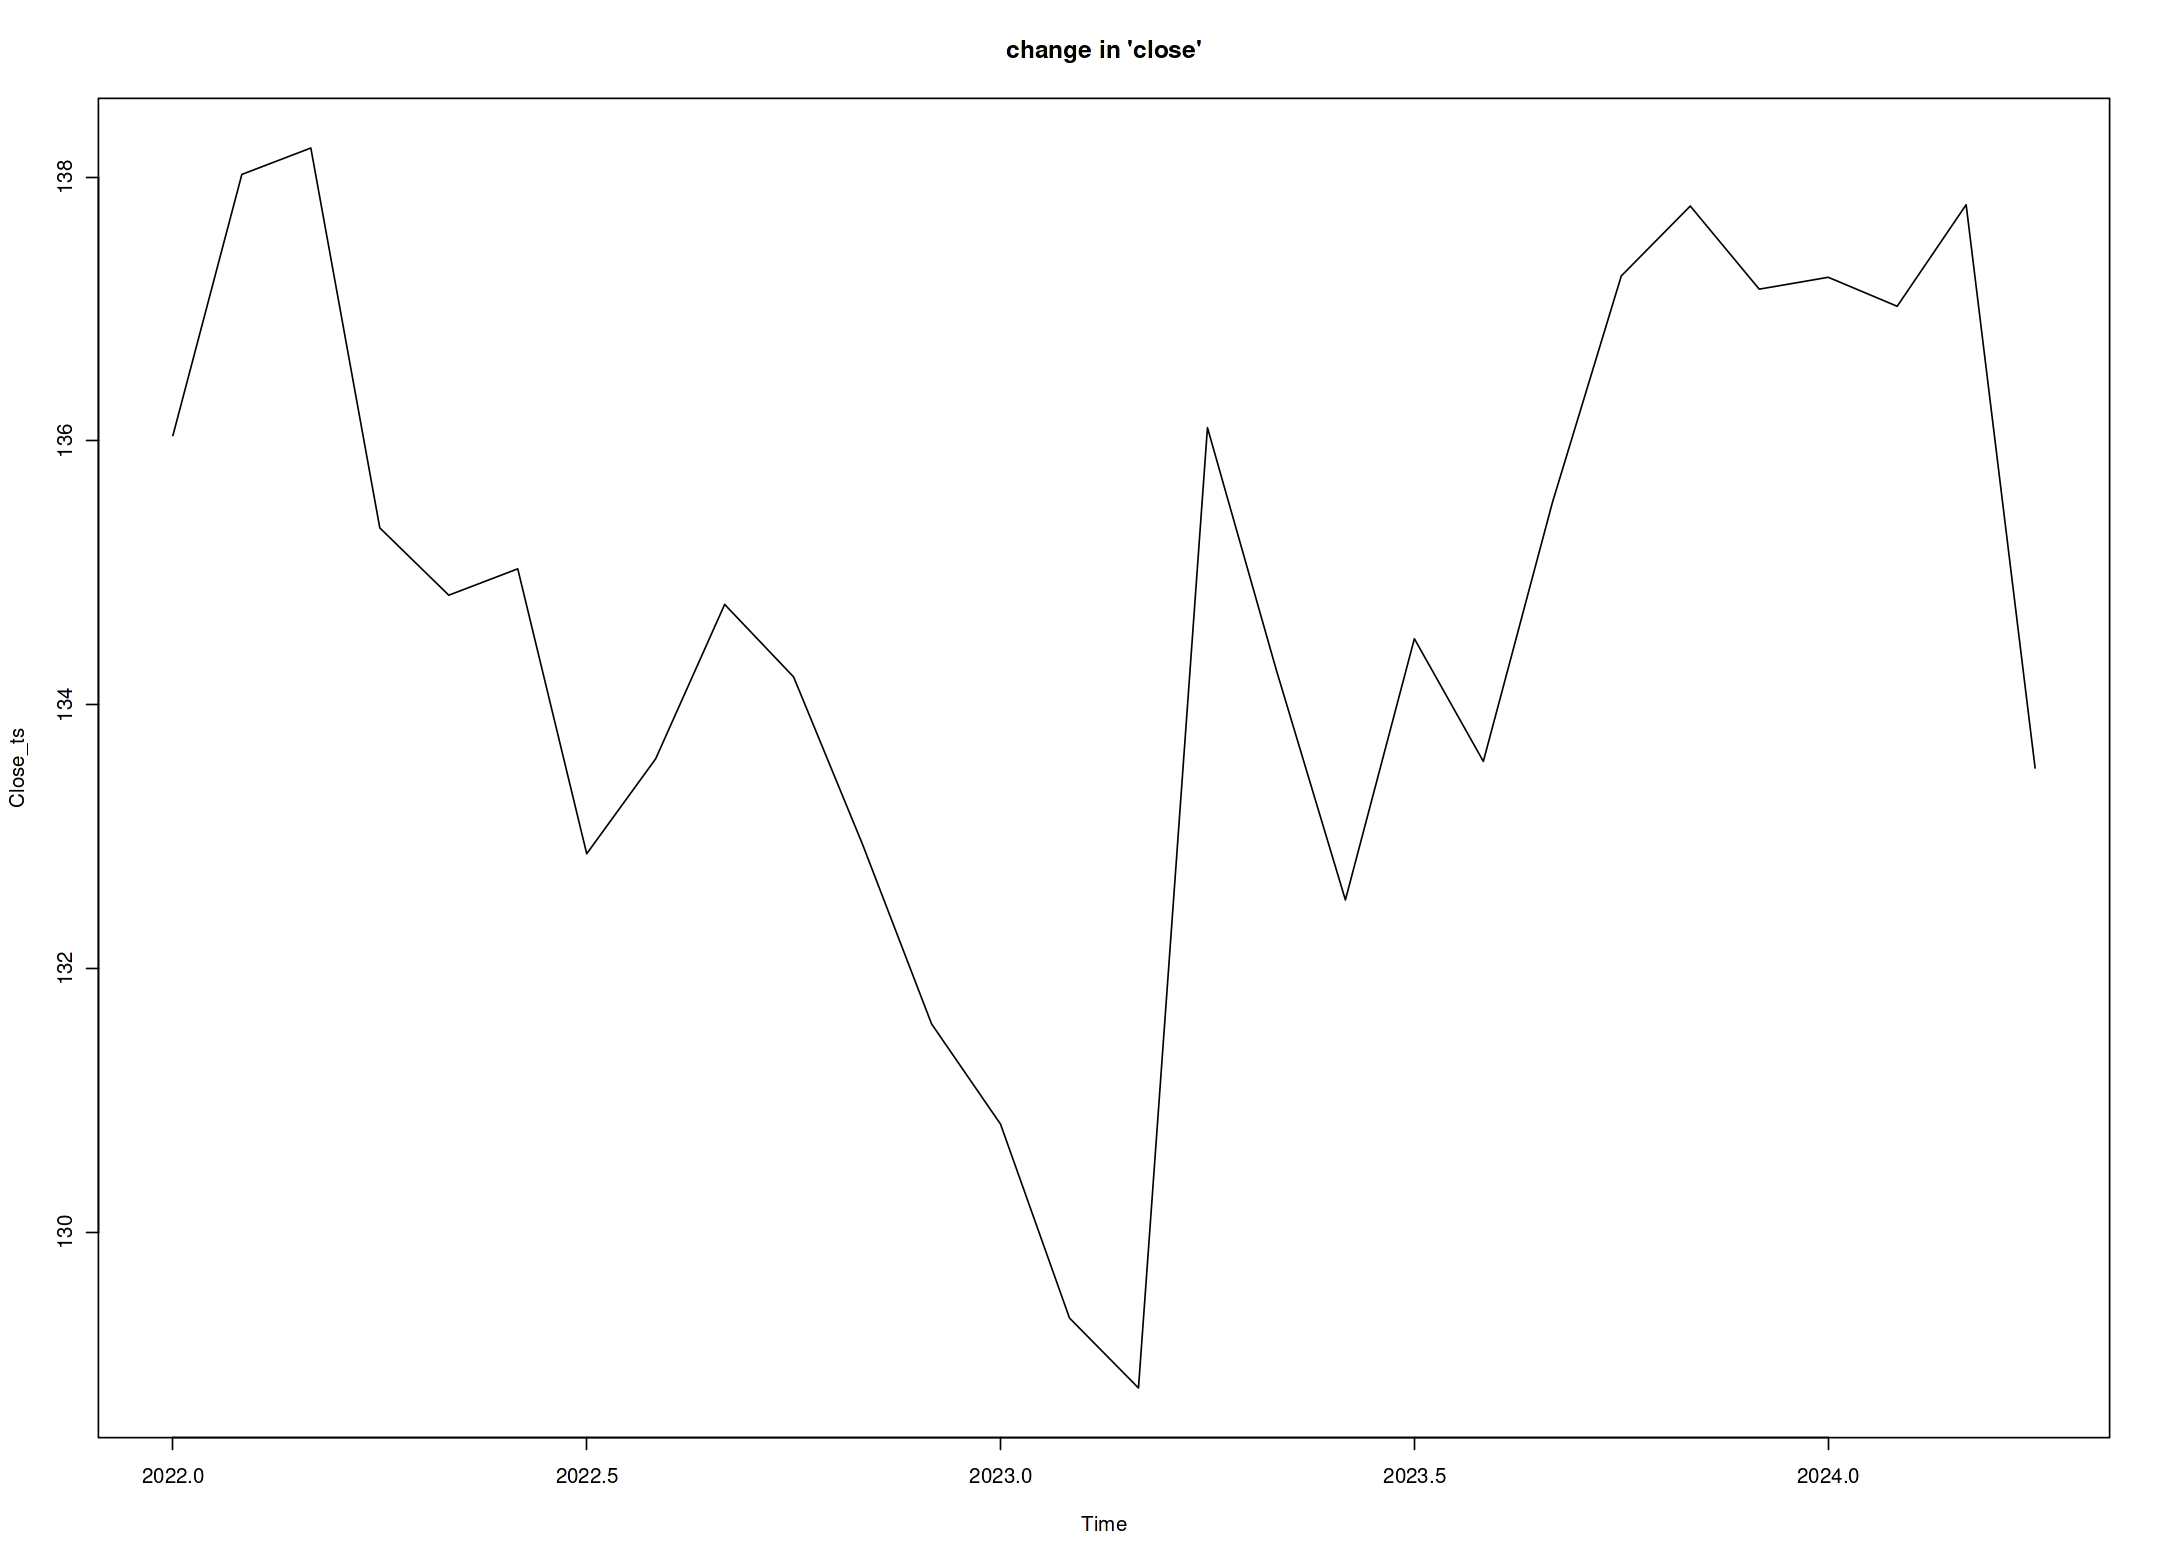

In [246]:
plot.ts(Close_ts, main = 'change in \'close\'')

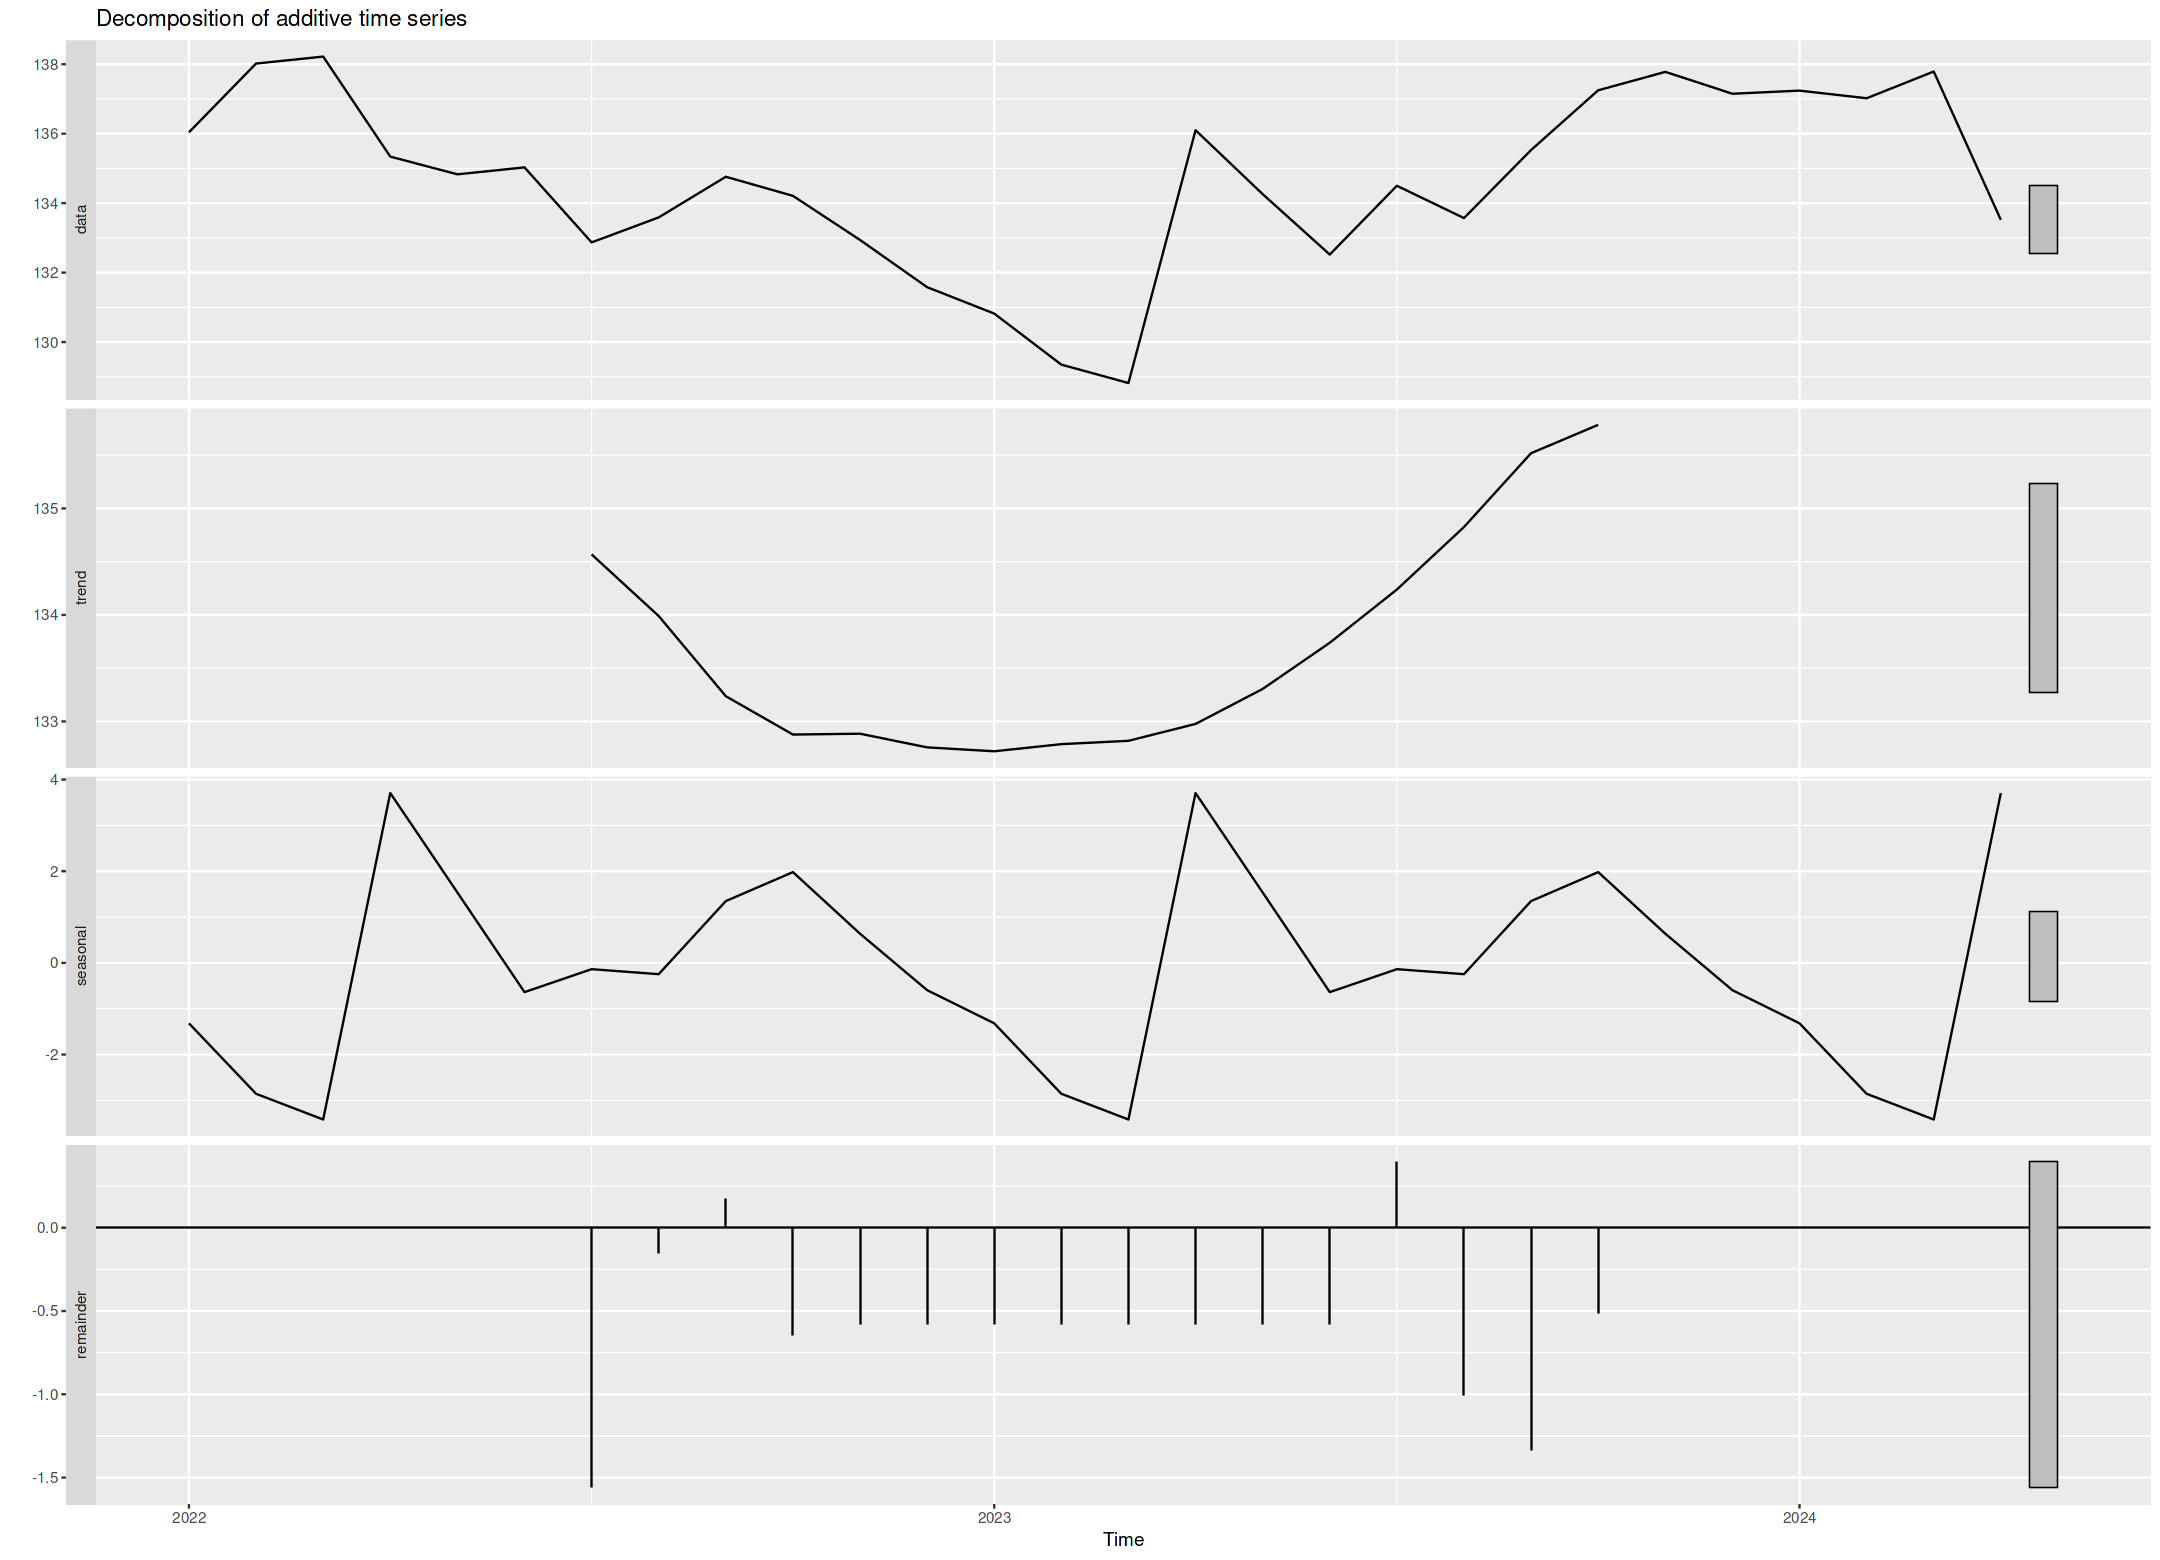

In [247]:
autoplot(decompose(Close_ts))

In [248]:
clos_diff <- diff(Close_ts)

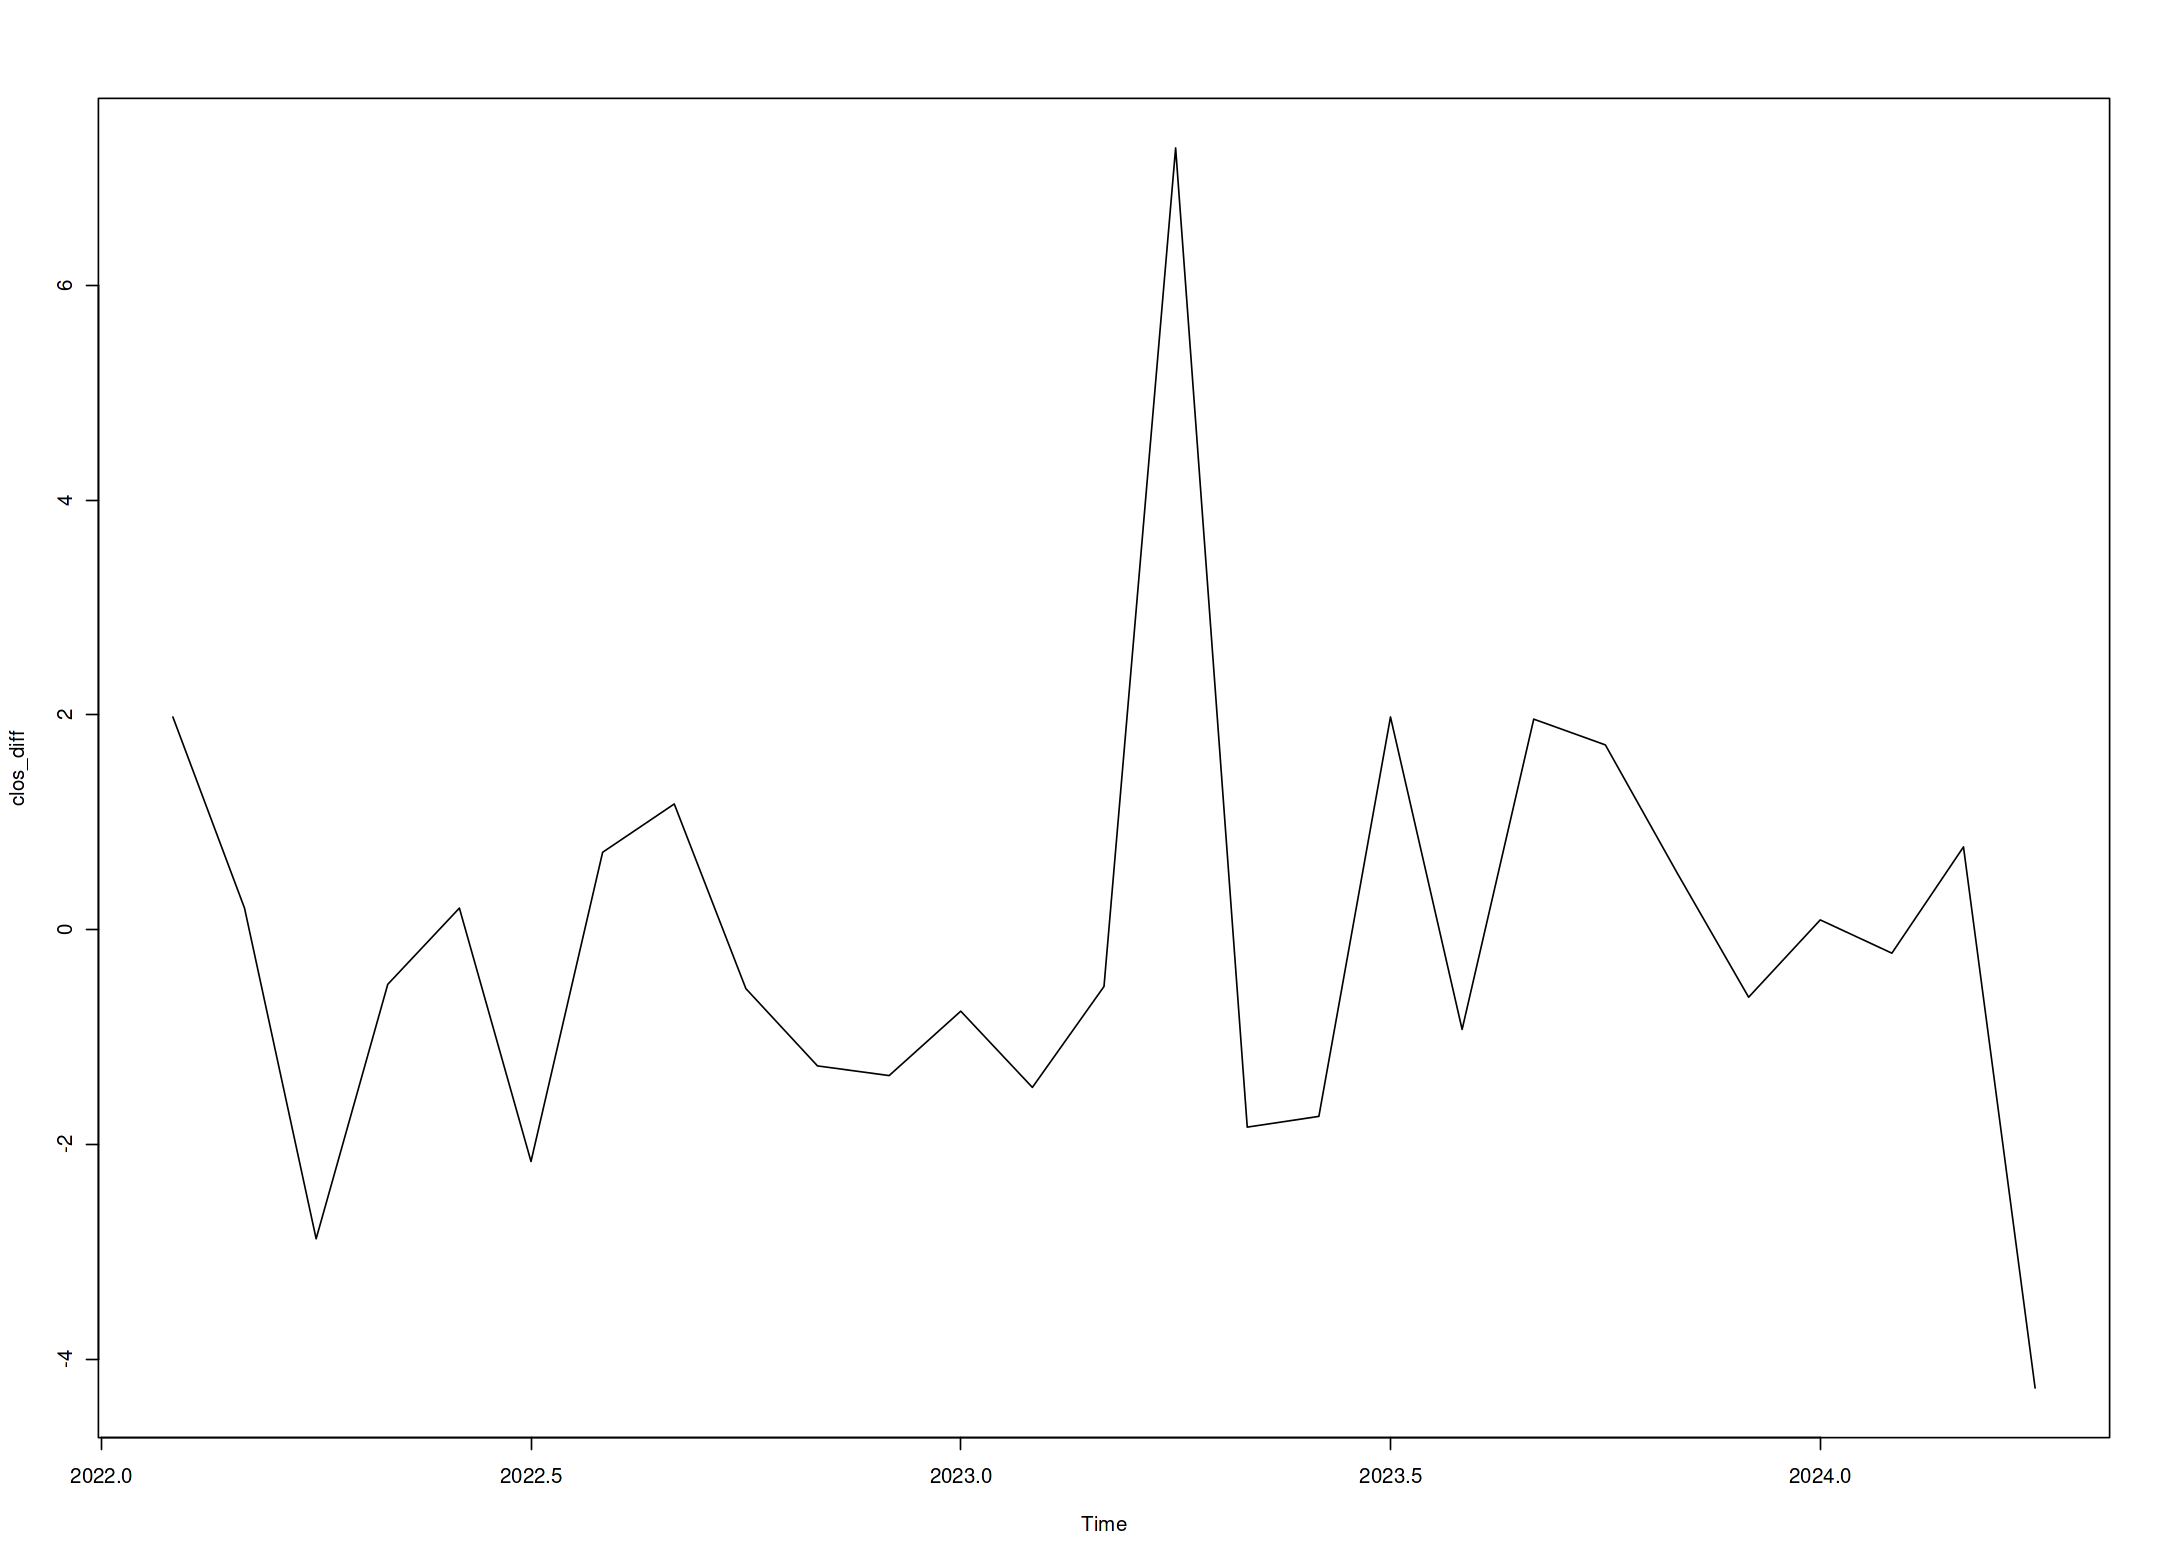

In [249]:
plot(clos_diff)

## **Training Model**

In [250]:
fit <- auto.arima(Close_ts)

In [251]:
summary(fit)

Series: Close_ts 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1      mean
      0.6483  134.6793
s.e.  0.1368    0.9445

sigma^2 = 3.766:  log likelihood = -57.53
AIC=121.06   AICc=122.06   BIC=125.05

Training set error measures:
                      ME     RMSE      MAE         MPE     MAPE      MASE
Training set -0.04309643 1.869935 1.553776 -0.05188325 1.157016 0.3621858
                   ACF1
Training set 0.04174063

## **Arima Model**

In [252]:
model <- arima(Close_ts, order = c(1,0,0))
summary(model)


Call:
arima(x = Close_ts, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6483   134.6793
s.e.  0.1368     0.9445

sigma^2 estimated as 3.497:  log likelihood = -57.53,  aic = 121.06

Training set error measures:
                      ME     RMSE      MAE         MPE     MAPE     MASE
Training set -0.04309643 1.869935 1.553776 -0.05188325 1.157016 1.056193
                   ACF1
Training set 0.04174063

## **Prediction**

In [253]:
# Six Month prediction
pred <- forecast(model, h = 12 / 2)

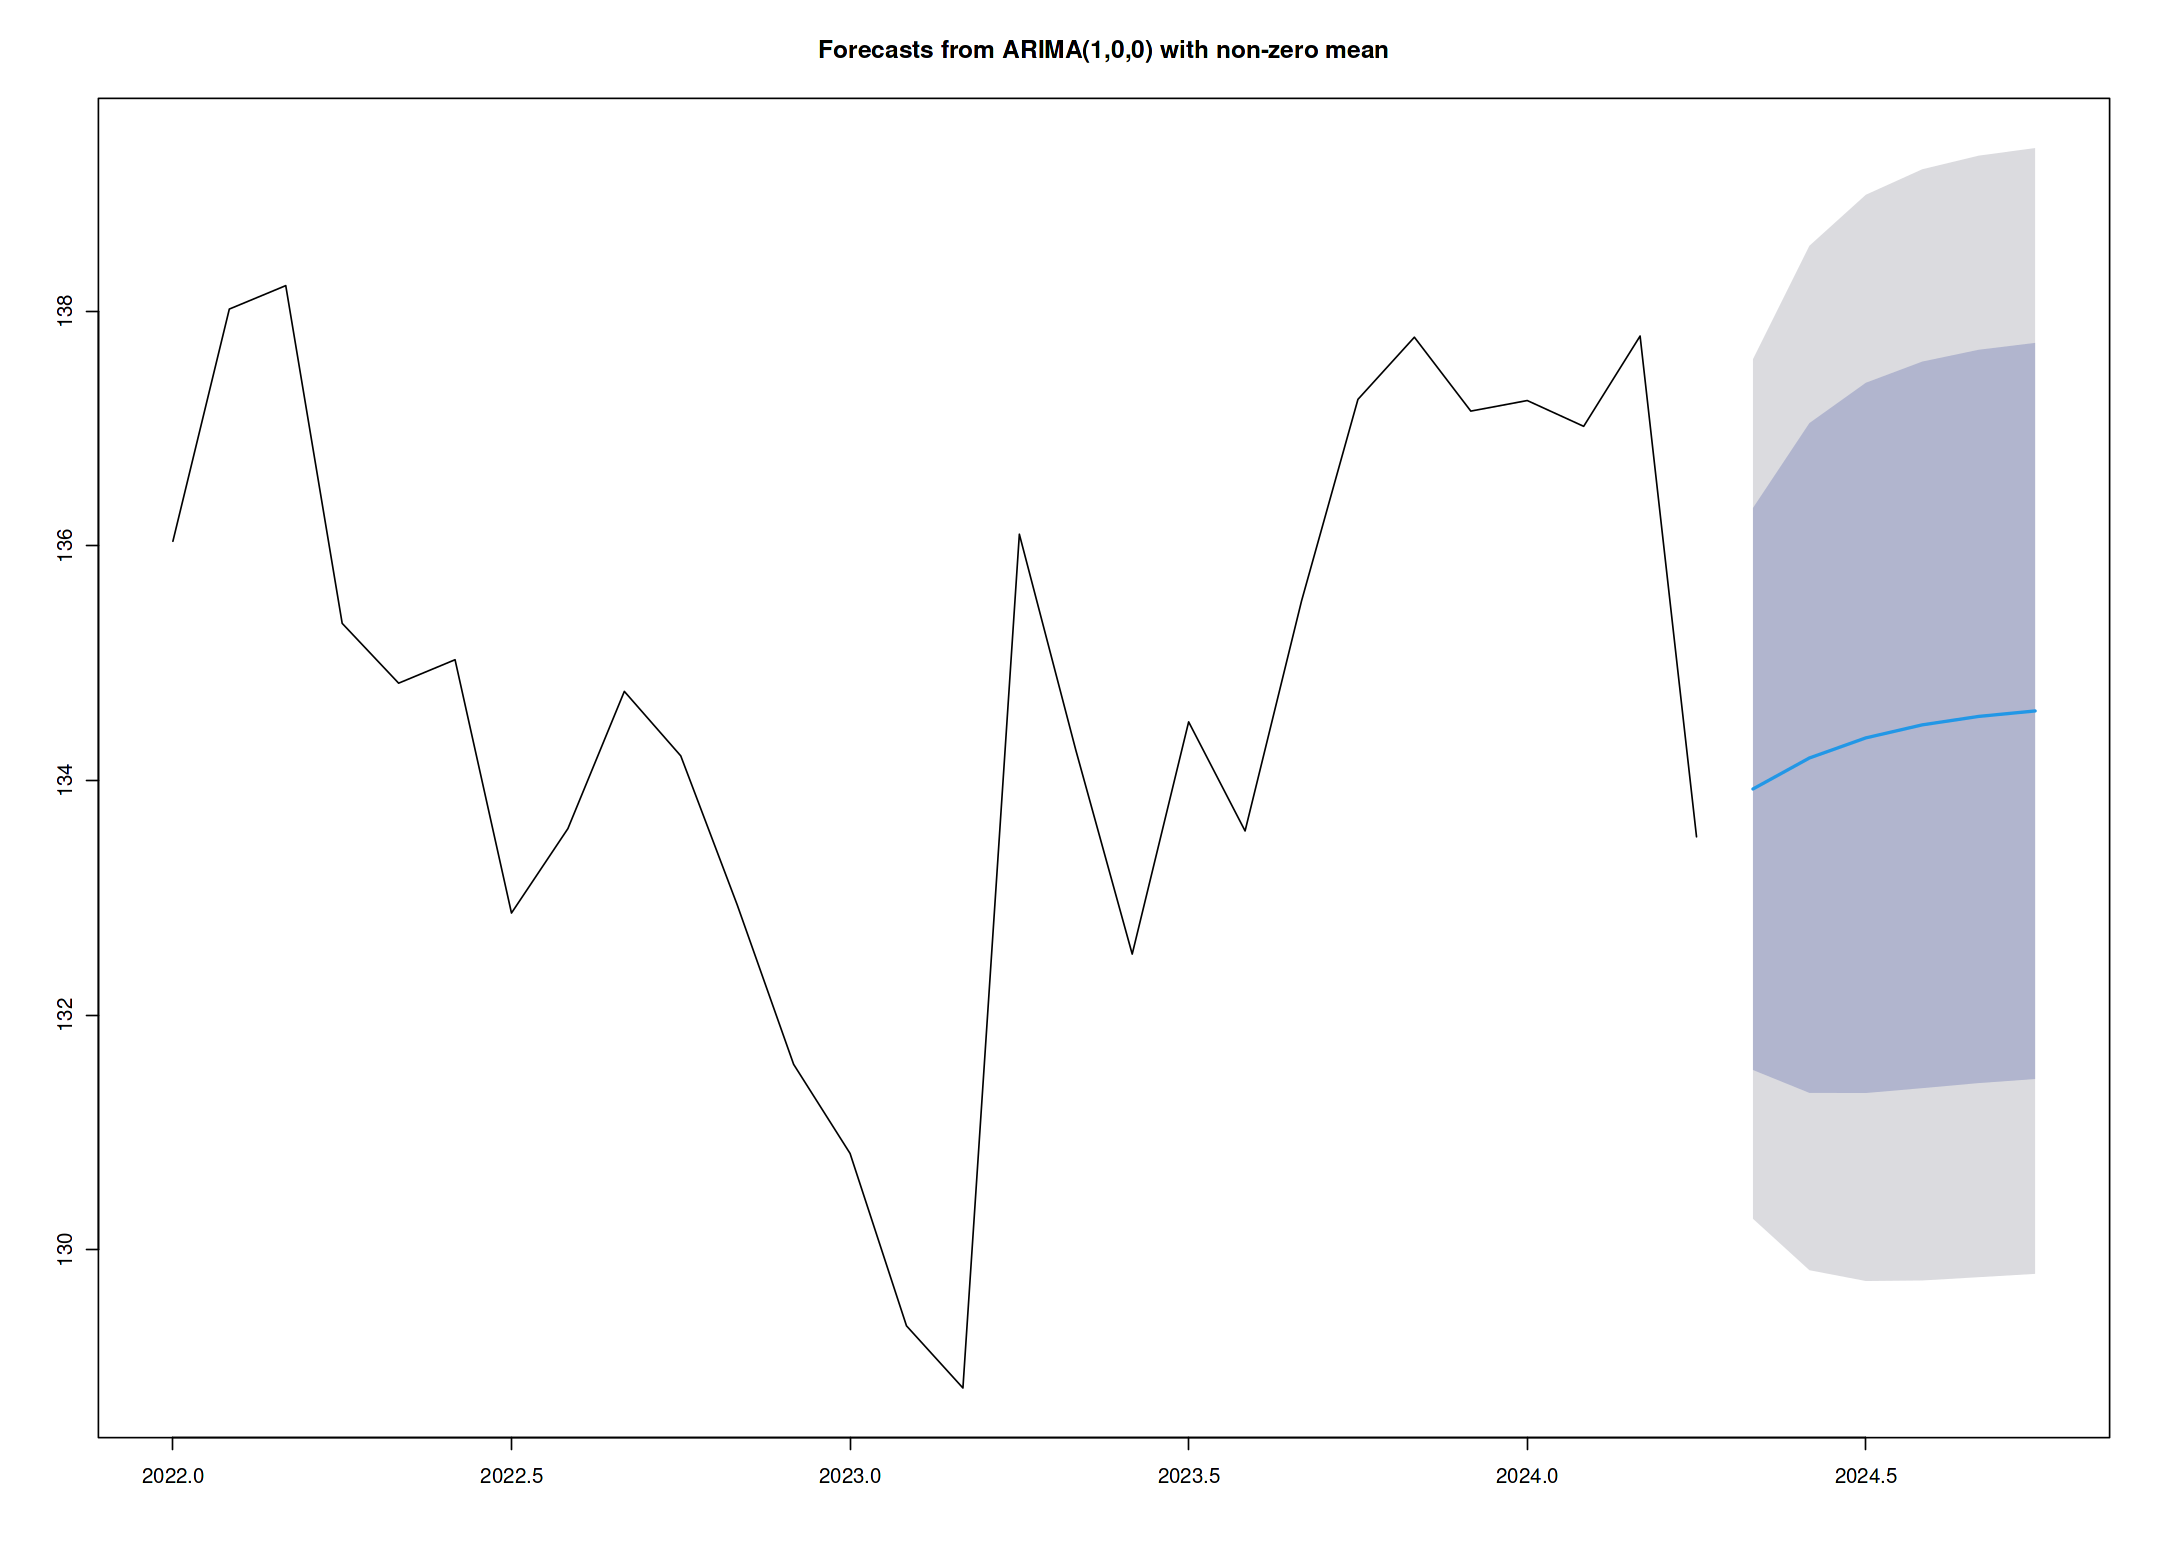

In [254]:
plot(pred)

**Please leave your advice in the comments. Thank you**